In [1]:
using Printf

include("majorityPredictor.jl")
include("decisionStump.jl")
include("plot2Dclassifier.jl")
include("decisionTree.jl")


# Load X and y variable
using JLD
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")

# Compute number of objects and number of features
(n,d) = size(X)



(400, 2)

# Majority Predictor Model


In [2]:
# Fit majority predictor and compute error
# include("majorityPredictor.jl")
model = majorityPredictor(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with majority predictor: %.2f\n",trainError);



Error with majority predictor: 0.41


# Decision Stump
## Equality Moodel

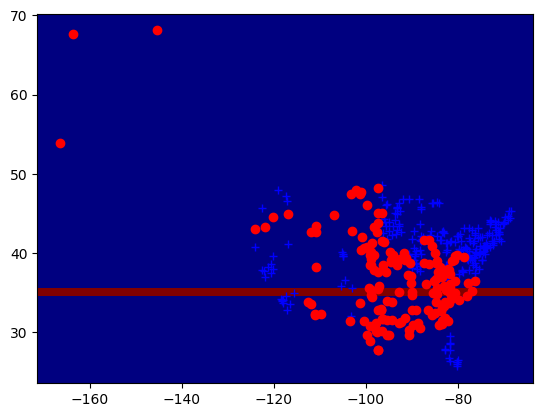

Error with equality-rule decision stump: 0.38


PyObject <matplotlib.contour.QuadContourSet object at 0x7fb2e493d4a8>

In [3]:
# Fit decision stump classifier that uses equalities
# include("decisionStump.jl")
model = decisionStumpEquality(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with equality-rule decision stump: %.2f\n",trainError);

# Plot classifier
# include("plot2Dclassifier.jl")
plot2Dclassifier(X,y,model)


## Inequality Moodel

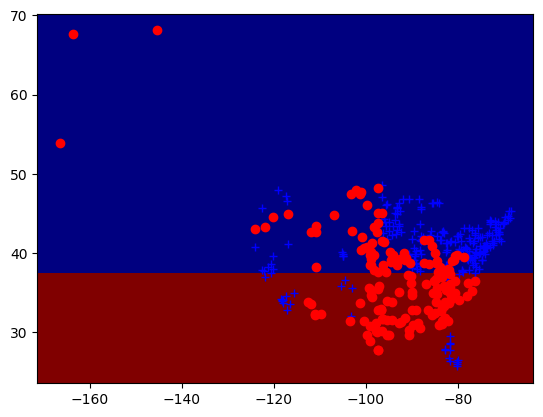

2	37.669007
Error with equality-rule decision stump: 0.252500


PyObject <matplotlib.contour.QuadContourSet object at 0x7fb2dc2c82e8>

In [4]:
# Fit decision stump classifier that uses equalities
# include("decisionStump.jl")
model = decisionStump(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with equality-rule decision stump: %f\n",trainError);

# Plot classifier
# include("plot2Dclassifier.jl")
plot2Dclassifier(X,y,model)


# Decision Tree

2	37.669007
1	-96.090109
1	-115.577574


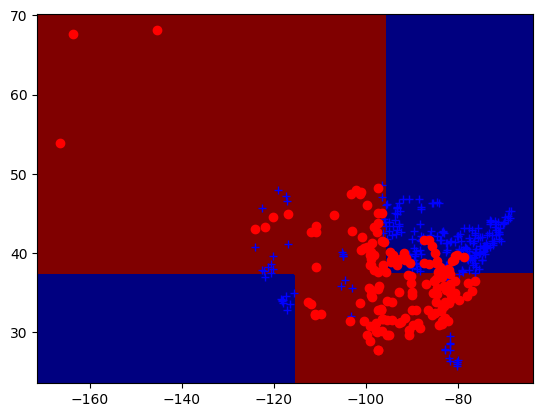

Error with depth-2 decision tree: 0.172


PyObject <matplotlib.contour.QuadContourSet object at 0x7fb2dc3e5a20>

In [5]:
# Load X and y variable
# using JLD
# X = load("citiesSmall.jld","X")
# y = load("citiesSmall.jld","y")
# n = size(X,1)

# Fit a decision tree and compute error
# include("decisionTree.jl")
depth = 2
model = decisionTree(X,y,depth)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with depth-%d decision tree: %.3f\n",depth,trainError)

# Plot classifier
# include("plot2Dclassifier.jl")
plot2Dclassifier(X,y,model)


### Red is 2

In [6]:
function predict_element(x)
    x = round.(x)
    if x[2] >= 37.695206
        if x[1] >= -96.032692
            return 1
        else
            return 2
        end
    else
        if x[1] >= -112.548331
            return 2
        else 
            return 1
        end
    end
end

function predict(X)
    n, _ = size(X)
    yhat = zeros(n)
    for i in 1:n
        yhat[i] = predict_element(X[i, :])
    end
    return yhat
end

simple_model = GenericModel(predict)
yhat2 = simple_model.predict(X);

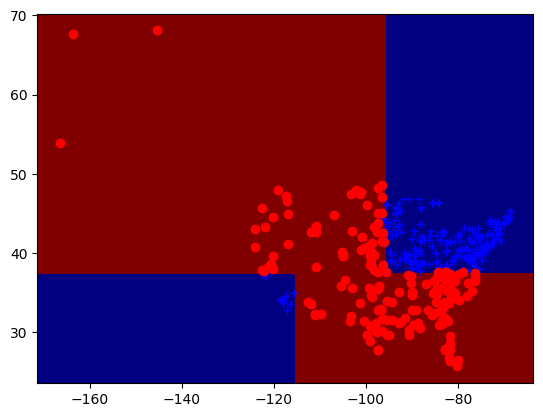

PyObject <matplotlib.contour.QuadContourSet object at 0x7fb2e1a90d68>

In [7]:
plot2Dclassifier(X,yhat,model)


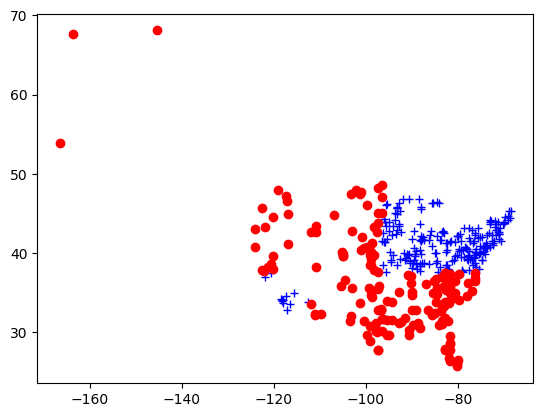

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb2dc289470>

In [8]:
plot(X[yhat2.==1,1],X[yhat2.==1,2],"b+")
plot(X[yhat2.==2,1],X[yhat2.==2,2],"ro")
